In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import warnings
import itertools
from datetime import datetime

Time
1994-03-01    10.2985
1994-04-01     9.5100
1994-05-01     9.7960
1994-06-01     9.4685
1994-07-01     9.6720
Name: Production, dtype: float64


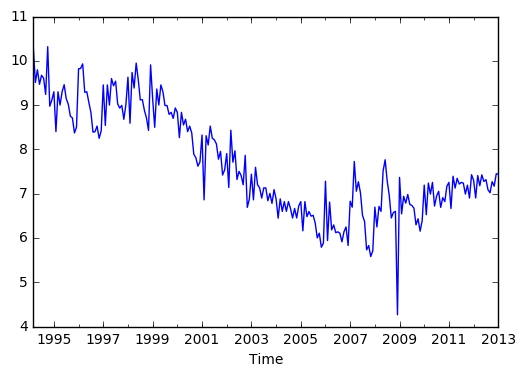

In [2]:
def parser(x):
	return datetime.strptime(x, '%Y%m')

#load dataset
series = read_csv('oil_production.csv', header=0,parse_dates=[0],index_col=0, squeeze=True,date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

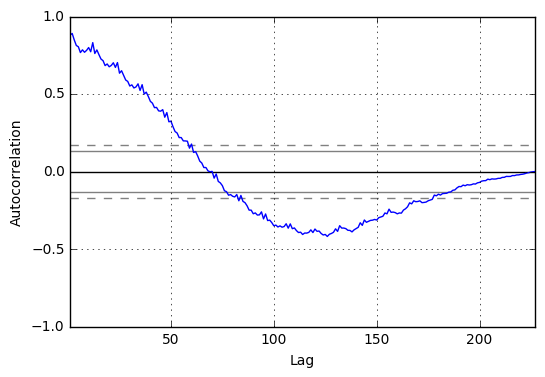

In [3]:
#draw autocorrelation plot
#autocorrelation are numerical values that indicate how a data series is related to itself over time.
#Autocorrelations may range from +1 to -1. A value close to +1 indicates a high positive correlation while a value close to -1 implies a high negative correlation.
autocorrelation_plot(series)
pyplot.show()

In [4]:
#Parameter Selection for the ARIMA Time Series Model
#our first goal is to find the values of ARIMA(p,d,q)
#We will use a "grid search" to iteratively explore different combinations of parameters. 
#For each combination of parameters, we fit a new  ARIMA model.
p = range(1,20)
d = range(1,3)
q = range(0,3)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print(len(pdq))

114


In [5]:
#When evaluating and comparing statistical models fitted with different parameters, 
#each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points.
#We will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels.
#warnings.filterwarnings("ignore") # specify to ignore warning messages
X = series.values
aic=[]
param1=[]
warnings.filterwarnings("ignore")
for param in pdq:
    
    try:
        model = ARIMA(X,order=param)
        model_fit = model.fit(disp=0)
        a = model_fit.aic
        param1.append(param)
        aic.append(a)
        print('ARIMA{} - AIC:{}'.format(param,a ))
    except:
        continue
mini = min(aic)
index = aic.index(mini)
print('selscted ARIMA model is ARIMA{} - AIC:{}'.format(param1[index],mini))

        

ARIMA(1, 1, 0) - AIC:289.16753181807394
ARIMA(1, 1, 1) - AIC:287.0716043050031
ARIMA(1, 1, 2) - AIC:288.7413636444013
ARIMA(1, 2, 0) - AIC:446.43427487172283
ARIMA(1, 2, 1) - AIC:296.51867157270004
ARIMA(2, 1, 0) - AIC:286.19697134002047
ARIMA(2, 1, 1) - AIC:284.68310773813965
ARIMA(2, 1, 2) - AIC:286.5354851605079
ARIMA(2, 2, 0) - AIC:367.3619876700094


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1) - AIC:293.64763955258053


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2) - AIC:292.374148908007
ARIMA(3, 1, 0) - AIC:286.88441868760094
ARIMA(3, 1, 1) - AIC:286.5834284229979
ARIMA(3, 1, 2) - AIC:277.70903866537844
ARIMA(3, 2, 0) - AIC:357.82670753771373
ARIMA(3, 2, 1) - AIC:294.2804507774301


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 2, 2) - AIC:293.99051235337714
ARIMA(4, 1, 0) - AIC:285.84522770536563
ARIMA(4, 1, 1) - AIC:268.9998297587536
ARIMA(4, 1, 2) - AIC:256.2238411236572
ARIMA(4, 2, 0) - AIC:344.7918049447753
ARIMA(4, 2, 1) - AIC:293.32159597081517


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


ARIMA(5, 1, 0) - AIC:287.6336974932932
ARIMA(5, 1, 1) - AIC:269.01029109677575


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 2) - AIC:273.12647938323835
ARIMA(5, 2, 0) - AIC:346.4087167530091


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 2, 1) - AIC:295.15258468690155


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 2, 2) - AIC:288.8413166577529
ARIMA(6, 1, 0) - AIC:276.2607616637255
ARIMA(6, 1, 1) - AIC:258.1528672148032


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 2) - AIC:256.1428126378517
ARIMA(6, 2, 0) - AIC:344.73933292887733


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 2, 1) - AIC:285.0622514294619
ARIMA(7, 1, 0) - AIC:269.72556012072926
ARIMA(7, 1, 1) - AIC:259.1796920518211


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 2) - AIC:245.35943544089548
ARIMA(7, 2, 0) - AIC:340.3067169141062


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 2, 1) - AIC:278.59484013772095


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 2, 2) - AIC:269.73019761038086
ARIMA(8, 1, 0) - AIC:265.61089553791174


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 1, 1) - AIC:259.9662533922823


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 1, 2) - AIC:247.259505834634
ARIMA(8, 2, 0) - AIC:337.83534027128354


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 2, 2) - AIC:270.6124880109382
ARIMA(9, 1, 0) - AIC:257.83846425107527
ARIMA(9, 1, 1) - AIC:236.26288482426116
ARIMA(9, 2, 0) - AIC:308.6967605475399
ARIMA(9, 2, 1) - AIC:292.9454424318812


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(9, 2, 2) - AIC:244.40530598243458
ARIMA(10, 1, 0) - AIC:258.28908358565536
ARIMA(10, 1, 1) - AIC:237.20302490291692


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(10, 1, 2) - AIC:239.32993151888695
ARIMA(10, 2, 0) - AIC:309.26261116164494


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(10, 2, 1) - AIC:294.91893733190744


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(10, 2, 2) - AIC:245.81919060893904


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(11, 1, 0) - AIC:228.31328054559725


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(11, 1, 1) - AIC:219.18992912288508


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(11, 1, 2) - AIC:218.8757806227252
ARIMA(11, 2, 0) - AIC:254.73811473882364


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(11, 2, 1) - AIC:229.37588267261413


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(11, 2, 2) - AIC:223.36277328317175


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(12, 1, 0) - AIC:217.0737955502114


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(12, 1, 1) - AIC:218.80472148600631


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(12, 1, 2) - AIC:220.41915029487132


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(12, 2, 0) - AIC:253.4913996591455


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(12, 2, 1) - AIC:223.26729341351


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(13, 1, 0) - AIC:218.73974470592248


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(13, 1, 1) - AIC:220.7165277461296


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(13, 1, 2) - AIC:222.08832475910867


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(13, 2, 0) - AIC:252.08316197168494


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(14, 1, 0) - AIC:220.63697809035477


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(14, 1, 1) - AIC:219.5184174066345


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(14, 1, 2) - AIC:220.67857904456685


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(14, 2, 0) - AIC:247.2261805730373
ARIMA(15, 1, 0) - AIC:221.9711410300851


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(15, 1, 1) - AIC:220.07240407657542


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(15, 1, 2) - AIC:222.05531044320145


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(15, 2, 0) - AIC:241.02366273168053
ARIMA(16, 1, 0) - AIC:221.8493820788317


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(16, 1, 1) - AIC:222.23474905662687


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(16, 1, 2) - AIC:228.04294950022478


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(16, 2, 0) - AIC:239.56700305984782


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(17, 1, 0) - AIC:223.29750923084674


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(17, 1, 1) - AIC:225.08936404110113


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(17, 1, 2) - AIC:226.13875483150014


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(17, 2, 0) - AIC:240.48995148780898


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(18, 1, 0) - AIC:225.29139635953197


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(18, 1, 1) - AIC:226.67253386936744


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(18, 2, 0) - AIC:239.3158147304719


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(19, 1, 0) - AIC:226.51813087403207


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(19, 1, 1) - AIC:228.5192624413487


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(19, 1, 2) - AIC:222.7884031293832


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(19, 2, 0) - AIC:240.52701686385512
selscted ARIMA model is ARIMA(12, 1, 0) - AIC:217.0737955502114


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0109      0.006     -1.693      0.092      -0.024       0.002
ar.L1.D.Production     -0.6328      0.065     -9.783      0.000      -0.760      -0.506
ar.L2.D.Production     -0.2900      0.077     -3.785      0.000      -0.440      -0.140
ar.L3.D.Production     -0.1763      0.079     -2.229      0.027      -0.331      -0.021
ar.L4.D.Production     -0.2522      0.079     -3.195      0.002      -0.407      -0.097
ar.L5.D.Production     -0.2760      0.078     -3.517      0.001      -0.430      -0.122
ar.L6.D.Production     -0.3585      0.076     -4.695      0.000      -0.508      -0.209
ar.L7.D.Production     -0.3221      0.076     -4.237      0.000      -0.471      -0.173
ar.L8.D.Production     -0.2645      0.078     -3.402      0.001      -0.417      -0.112
ar.L9.D.Production     -0.1887  

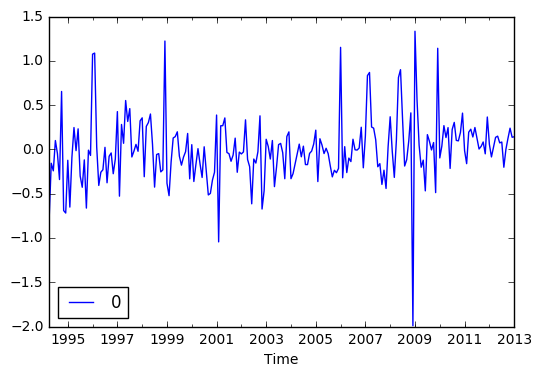

                0
count  226.000000
mean    -0.006537
std      0.370145
min     -1.991516
25%     -0.200356
50%     -0.020299
75%      0.141344
max      1.333338


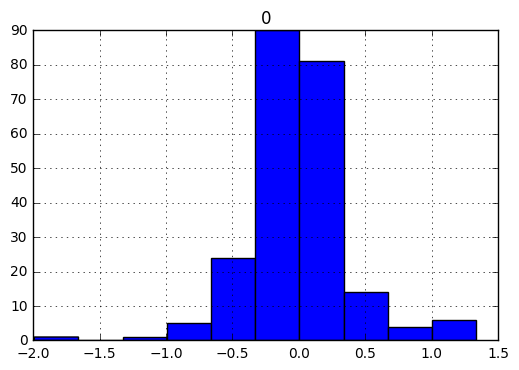

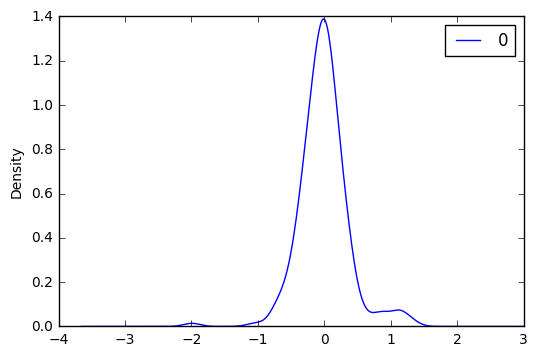

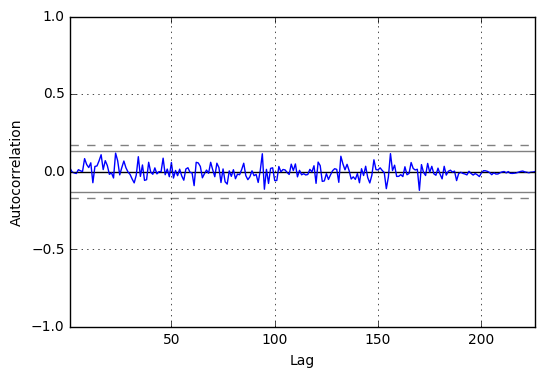

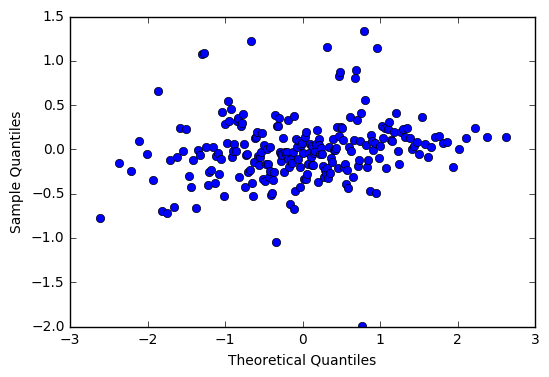

In [8]:
# Fit ARIMA(12,1,0) for all database and investigate the residual errors to make sure that it is the best model
# fit model
model = ARIMA(series, order=(12,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary().tables[1])
# plot residual errors line
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# Residual summary statistics
print(residuals.describe())
# Residual histogram plot
residuals.hist()
pyplot.show()
#Residual density plot
residuals.plot(kind='kde')
pyplot.show()
#Residual autocorrelation plot
autocorrelation_plot(residuals)
pyplot.show()
#Residual Q-Q plot
residuals = np.array(residuals)
qqplot(residuals)
pyplot.show()

In [5]:
# compute RMSPE
def RMSPE(x,y):
	result=0
	for i in range(len(x)):
		result += ((x[i]-y[i])/x[i])**2
	result /= len(x)
	result = sqrt(result)
	result *= 100
	return result

Forecasting Training Data
train RMSE: 0.45426
train RMSPE: 6.48172
Forecasting Test Data
test RMSE: 0.31009
Test RMSPE: 4.70594


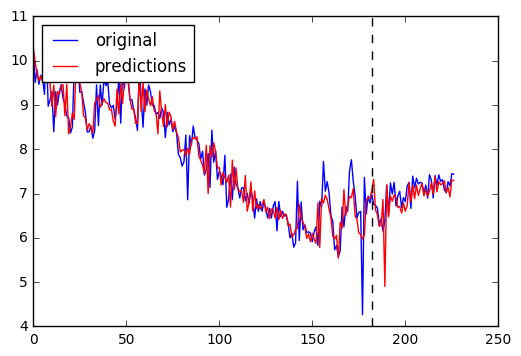

In [7]:
# split data into train and test and forecast test
X = series.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
warnings.filterwarnings("ignore")

#Fit ARIMA(12,1,0) on train data and find parameters
model = ARIMA(train, order=(12,1,0))
model_fit = model.fit(disp=0, transparams=True)
#predict train data
print('Forecasting Training Data') 
pred_train = model_fit.predict(start=1,end=size,typ='levels')
MSE_train = mean_squared_error(train, pred_train)
RMSE_train = sqrt(MSE_train)
RMSPE_train = RMSPE(train,pred_train)

print('train RMSE: %.5f' % RMSE_train)
print('train RMSPE: %.5f' % RMSPE_train)
pred_train=pred_train.tolist()
print('Forecasting Test Data')
# predict test data
history = [x for x in train]
pred_test = list()
for t in range(len(test)):
	model = ARIMA(history, order=(12,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	yhat = yhat.tolist()
	pred_test.append(yhat[0])
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
MSE_test = mean_squared_error(test, pred_test)
RMSE_test = sqrt(MSE_test)
RMSPE_test = RMSPE(test,pred_test)
print('test RMSE: %.5f' % RMSE_test)
print('Test RMSPE: %.5f' % RMSPE_test)
predictions = np.concatenate((pred_train,pred_test),axis=0)


# line plot of observed vs predicted

fig, ax = plt.subplots(1)
ax.plot(X, label='original', color='blue')
ax.plot(predictions, label='predictions', color='red')
ax.axvline(x=len(train)+1,color='k', linestyle='--')
ax.legend(loc='upper left')
plt.show()